In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from skimage.io import imread
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_img_size(path):
    for img in os.listdir(path):
        if img.endswith('.jpg') or img.endswith('.png'):
            shape = imread(path+img).shape
            
    return shape[0], shape[1], shape[2]


def get_set_images(path, flatten=True):
    width, height, channels = get_img_size(path)
    n_imgs = len(os.listdir(path))

    if flatten:
        image_set = np.zeros((n_imgs, width*height*channels), dtype=np.float32)
    else:
        image_set = np.zeros((n_imgs, width, height, channels), dtype=np.float32)

    for i, img in enumerate(os.listdir(path)):
        if img.endswith('.jpg') or img.endswith('.png'):
            if flatten:
                image_set[i] = imread(path+img).flatten()
            else:
                image_set[i] = imread(path+img)

    return image_set

In [3]:
train_path = "dataset/train/"
test_path = "dataset/test/"
classes = ["non-vehicles", "vehicles"]

nb_classes = 2
normalization = 1
flatten = 1

img_rows, img_colums, img_c = get_img_size(train_path+"non-vehicles/")

In [23]:
nv_train = get_set_images(train_path+"non-vehicles/", flatten)
v_train = get_set_images(train_path+"vehicles/", flatten)

if normalization:
    nv_train /= 255
    v_train /= 255

# Matrix where we will store all images:
train_data = np.vstack((nv_train, v_train))

In [24]:
train_data = np.array(train_data)
print(train_data.shape)

labels = np.zeros((train_data.shape[0]), dtype=int)
labels[:nv_train.shape[0]] = 1
labels[nv_train.shape[0]:] = 0

(15009, 12288)


In [25]:
train_data = [train_data, labels]

(X, y) = (train_data[0], train_data[1])

In [26]:
X, y = shuffle(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

if flatten:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_colums, img_c)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_colums, img_c)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

### Some test cases

[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


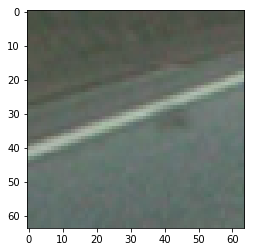

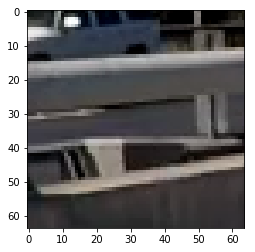

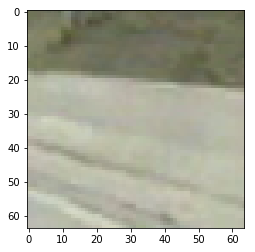

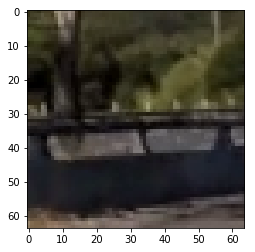

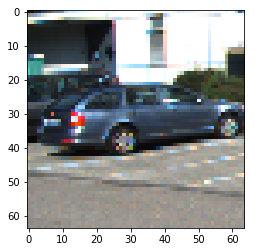

In [27]:
imgs = [1, 70, 400, 1000, 1234]

for i in imgs:
    plt.imshow(X_train[i])
    plt.figure()
    print(Y_train[i])

# Model

In [28]:
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, MaxPooling2D, Dropout, Dense, Flatten
from keras.utils import plot_model

batch_size = 32

nb_epoch = 10
nb_filters = 32
nb_pool = 2
nb_conv = 3
dropout = 0.2

input_shape = (img_rows, img_colums, img_c)
model = Sequential()

model.add(Convolution2D(nb_filters, (nb_conv, nb_conv), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [29]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          validation_data=(X_test, Y_test))

Train on 12007 samples, validate on 3002 samples
Epoch 1/10
12007/12007 [==============================] - 17s - loss: 0.2770 - acc: 0.8886 - val_loss: 0.0847 - val_acc: 0.9724
Epoch 2/10
12007/12007 [==============================] - 44s - loss: 0.0858 - acc: 0.9709 - val_loss: 0.1620 - val_acc: 0.9327
Epoch 3/10
12007/12007 [==============================] - 43s - loss: 0.0520 - acc: 0.9818 - val_loss: 0.0446 - val_acc: 0.9820
Epoch 4/10
12007/12007 [==============================] - 43s - loss: 0.0423 - acc: 0.9859 - val_loss: 0.0429 - val_acc: 0.9823
Epoch 5/10
12007/12007 [==============================] - 43s - loss: 0.0326 - acc: 0.9888 - val_loss: 0.0540 - val_acc: 0.9807
Epoch 6/10
12007/12007 [==============================] - 43s - loss: 0.0283 - acc: 0.9901 - val_loss: 0.0308 - val_acc: 0.9900
Epoch 7/10
12007/12007 [==============================] - 43s - loss: 0.0248 - acc: 0.9915 - val_loss: 0.0510 - val_acc: 0.9817
Epoch 8/10
12007/12007 [==============================]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


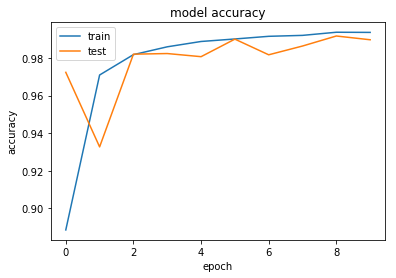

In [30]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
test_images = get_set_images(test_path+"vehicles/", False)

if normalization:
    test_images /= 255
test_images.shape

(400, 64, 64, 3)

In [32]:
predictions = model.predict(test_images)
rounded = [round(x[0]) for x in predictions]

print(rounded)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,